# Doctor Price Predictions:

In [497]:
#Importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import warnings:
import warnings
warnings.filterwarnings('ignore')

In [498]:
#Reading the Dataset:
raw_data_csv = pd.read_excel('C:\\Users\\MI Laptop\\Downloads\\Final_Train.xlsx')

In [499]:
type(raw_data_csv)

pandas.core.frame.DataFrame

In [500]:
raw_data_csv.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [501]:
#Taking a copy of main dataset:
df = raw_data_csv.copy()

In [502]:
#using Pd.options display max columns to check entire rows and columns in dataset.
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [503]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [504]:
#Lets Check the shape of dataset:
df.shape

(5961, 7)

In [505]:
#Lets Check the datatypes:
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [506]:
#Checking for categorical columns:
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
print("Categorical Columns:",cat_col)

Categorical Columns: ['Qualification', 'Experience', 'Rating', 'Place', 'Profile', 'Miscellaneous_Info']


In [507]:
#Checking Unique value of different Features:
print('Qualification:', df['Qualification'].nunique())
print('Experience:', df['Experience'].nunique())
print('Rating:', df['Rating'].nunique())
print('Place:', df['Place'].nunique())
print('Profile', df['Profile'].nunique())

Qualification: 1420
Experience: 64
Rating: 51
Place: 877
Profile 6


Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64


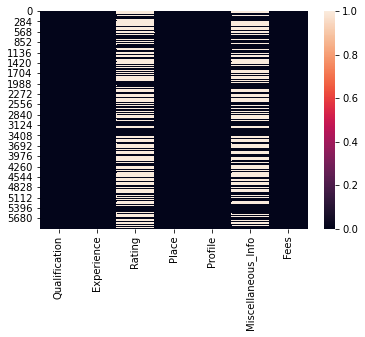

In [508]:
#Checking for null values:
print(df.isnull().sum())
sns.heatmap(df.isnull())

In [509]:
#Before removing the null values lets do some Data-Preprocessing:

In [510]:
#Extracting the no from year of Experience:
df['Experience'] = df['Experience'].str.replace("years experience",'').astype('int')#Converting to int datatype
#we have replaced Year of experience with blank value.

In [511]:
df['Experience'].head()

0    24
1    12
2     9
3    12
4    20
Name: Experience, dtype: int32

In [512]:
#Removing the %Column from Rating and eventually filling up the null values with 0%:
df['Rating'].fillna('0%',inplace = True) #Replacing the null values.
df['Rating'] = df['Rating'].str.replace("%",'').astype('int')
#Replacing % with blank.

In [513]:
df['Rating'].head()

0    100
1     98
2      0
3      0
4    100
Name: Rating, dtype: int32

In [514]:
#Extracting City and Area from Place Column:
df['City'] = df['Place'].str.split(',',1).str.get(1)
df['Area'] = df['Place'].str.split(',',1).str.get(0)

In [515]:
#Dropping Place column:
df.drop(columns='Place',axis=1,inplace=True)

In [516]:
#Cheking for null values Again:
df.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Profile                  0
Miscellaneous_Info    2620
Fees                     0
City                    26
Area                    25
dtype: int64

In [517]:
#Filling up null values in City and Area Column:
df['City'].fillna('unknown',inplace=True)
df['Area'].fillna('unknown',inplace=True)
#Here we replaced null values with unknown values:

In [518]:
#Working With Miscellaneous_Info Column:
#We are going to create new column that contain only Miscellaneous_Info:
df['Has_M_info'] = (~df['Miscellaneous_Info'].isnull())
df['Has_M_info'] = df['Has_M_info'].astype(int)

In [519]:
df['Has_M_info'].value_counts()

1    3341
0    2620
Name: Has_M_info, dtype: int64

In [520]:
#Dropping Miscellaneous_Info Columns:
df.drop(columns='Miscellaneous_Info',axis=1,inplace=True)

Qualification    0
Experience       0
Rating           0
Profile          0
Fees             0
City             0
Area             0
Has_M_info       0
dtype: int64


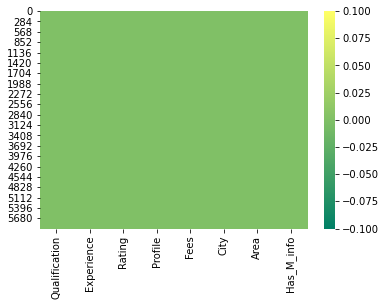

In [521]:
# Final Checking for null values:
print(df.isnull().sum())
sns.heatmap(df.isnull(),cmap='summer')

In [522]:
df.head()

,Qualification,Experience,Rating,Profile,Fees,City,Area,Has_M_info
0,"BHMS, MD - Homeopathy",24,100,Homeopath,100,Ernakulam,Kakkanad,1
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,350,Bangalore,Whitefield,1
2,"MBBS, MS - Otorhinolaryngology",9,0,ENT Specialist,300,Bangalore,Mathikere - BEL,0
3,"BSc - Zoology, BAMS",12,0,Ayurveda,250,Bangalore,Bannerghatta Road,1
4,BAMS,20,100,Ayurveda,250,Chennai,Keelkattalai,1


Exploratory Data Analysis

1.Univarite Analysis

2.Bivariate Analysis

3.Mulvariate Analysis

4.Here we check the relationship between different independant and dependant variable

Text(0.5, 1.0, 'Count of Fees')

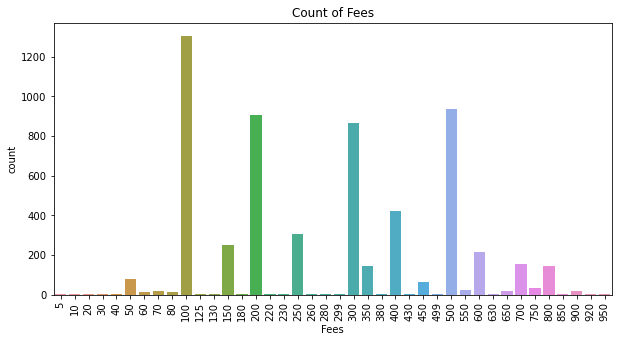

In [523]:
#Univariate Analysis:
#Checking Count of Target Varibale:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(df['Fees'].sort_values())
plt.title('Count of Fees')

In [524]:
df['Fees'].max() #Checking Max Fees

950

In [525]:
df.loc[df['Fees'] == 950] #Checking the details of doctor

,Qualification,Experience,Rating,Profile,Fees,City,Area,Has_M_info
293,"MBBS, MD - Internal Medicine, FRCP",29,100,General Medicine,950,Chennai,Adyar,1


In [526]:
#Highest Fees is 950 rupees and the doctor having 29 years of experience.

Text(0.5, 1.0, 'Experience in years')

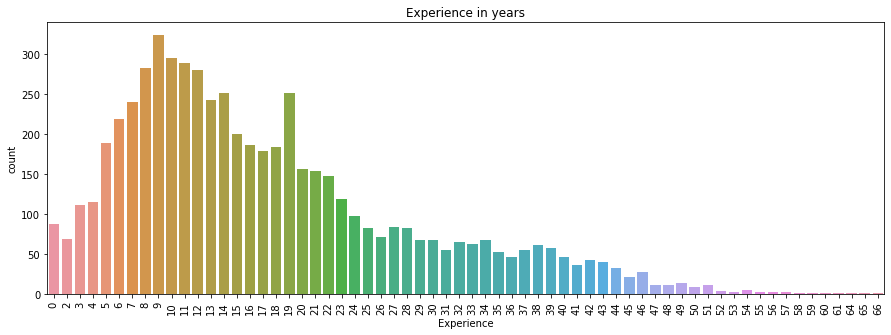

In [527]:
#Univariate Analysis:
#Checking Count of Experience:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(df['Experience'])
plt.title('Experience in years')

In [528]:
df['Experience'].max() #Checking Max years of Experience.

66

In [529]:
df.loc[df['Experience'] == 66] #Checking the details of doctor

,Qualification,Experience,Rating,Profile,Fees,City,Area,Has_M_info
372,"MBBS, Diploma in Otorhinolaryngology (DLO)",66,0,ENT Specialist,100,Chennai,Greams Road,0


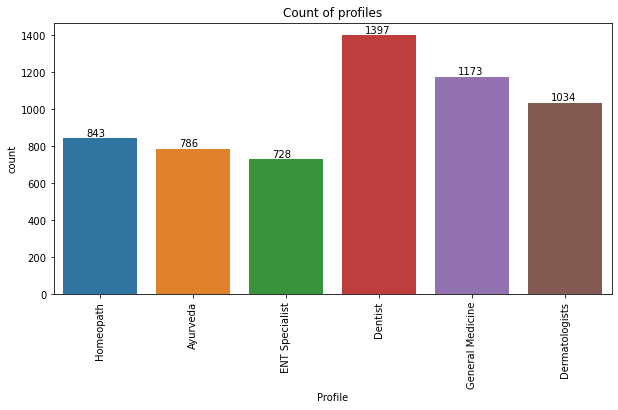

In [530]:
#Univariate Analysis:
#Checking Count of Profile:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
ax = sns.countplot(df['Profile'])
plt.title('Count of profiles')
for p in ax.patches:
       ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

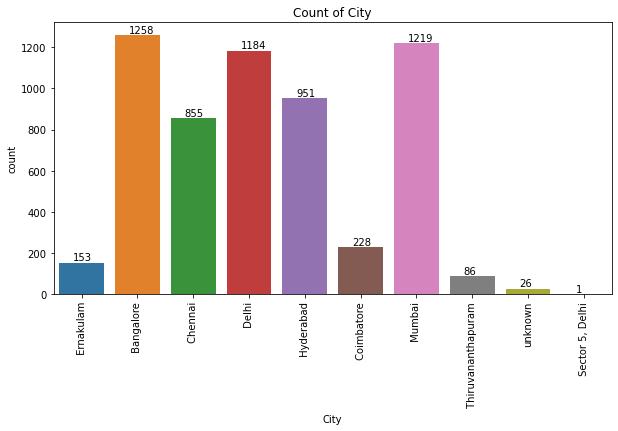

In [531]:
#Univariate Analysis:
#Checking Count of City:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
ax = sns.countplot(df['City'])
plt.title('Count of City')
for p in ax.patches:
       ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

Text(0, 0.5, 'Fees')

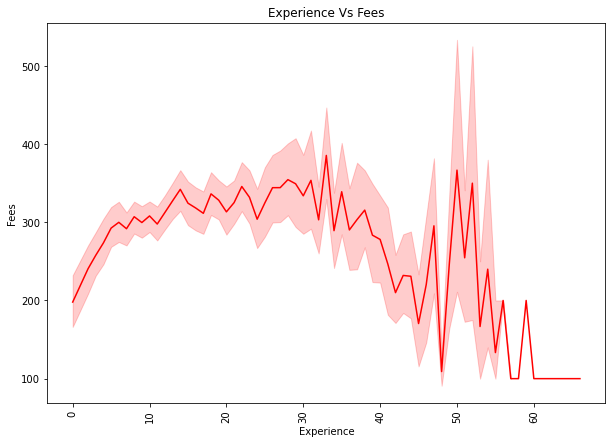

In [532]:
# Bivariate Analysis Linear regression with marginal distributions
# Checking the relation Bewtween Experience and Fees:
plt.figure(figsize=(10,7))
sns.lineplot(x="Experience", y="Fees", data=df,color='red')
plt.xlabel('Experience')
plt.xticks(rotation=90)
plt.title("Experience Vs Fees")
plt.ylabel('Fees')

In [533]:
#Doctors having 30 to 40 years of experience are taking more fees.
#Doctors having more than 50 years of experience are charging less fees.
#We can conclude that the Fees of Doctor is increasing with increase in exp upto certain level afterwords its decreasing.

Text(0, 0.5, 'Fees')

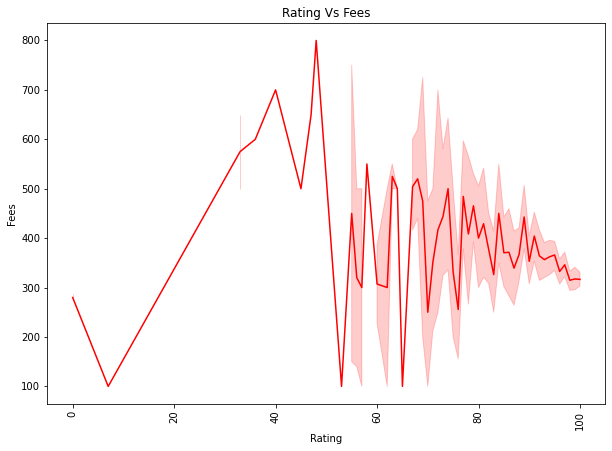

In [534]:
# Bivariate Analysis Linear regression with marginal distributions
# Checking the relation Bewtween Rating and Fees:
plt.figure(figsize=(10,7))
sns.lineplot(x="Rating", y="Fees", data=df,color='red')
plt.xlabel('Rating')
plt.xticks(rotation=90)
plt.title("Rating Vs Fees")
plt.ylabel('Fees')

In [535]:
#Most of the ratings are between 40% to 60 % with avegge fees of 750 to 800 rupees.
#Rating are high for the Doctors those who are charging less fees.

Text(-85.825, 0.5, 'City')

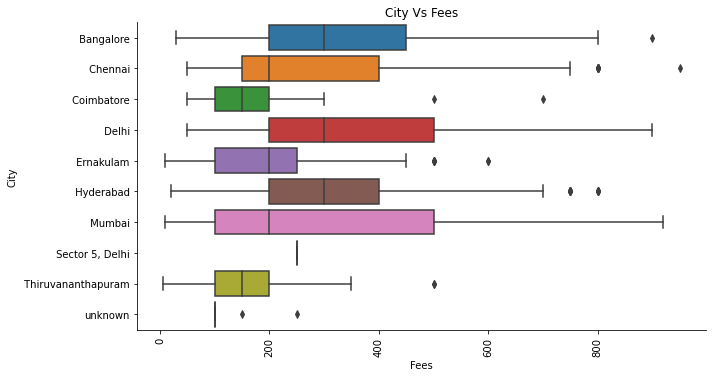

In [536]:
# Bivariate Analysis Linear regression with marginal distributions
# Checking the relation Bewtween City and Fees:
sns.catplot(x="Fees", y="City", data=df.sort_values("City"),kind='box',height=5,aspect= 2)
plt.xlabel('Fees')
plt.xticks(rotation=90)
plt.title("City Vs Fees")
plt.ylabel('City')

In [537]:
#Doctors from Bangalore and Chennai are charging more fees.

Text(-64.7, 0.5, 'Profile')

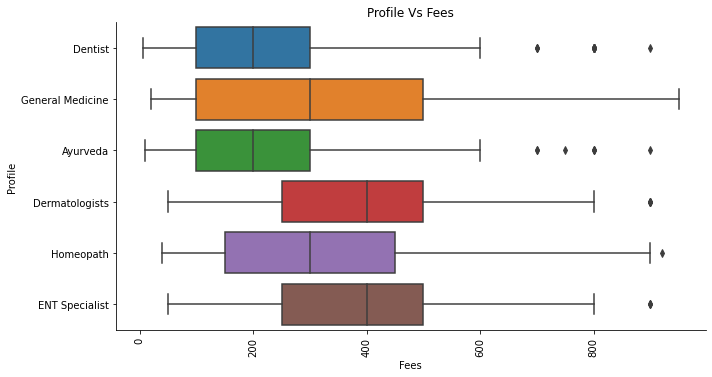

In [538]:
# Bivariate Analysis Linear regression with marginal distributions
# Checking the relation Bewtween Profile and Fees:
sns.catplot(x="Fees", y="Profile", data=df.sort_values("City"),kind='box',height=5,aspect= 2)
plt.xlabel('Fees')
plt.xticks(rotation=90)
plt.title("Profile Vs Fees")
plt.ylabel('Profile')

In [539]:
#Genral Medicines Profile is more expensive than others.
#Doctors from General Medicines Profile are charging more Fees.

Text Preprocessing: By Using TF-IDF

In [540]:
#Lets workout with Qualification columns and preprocess the text data to neumeric:
type(df['Qualification'])
#Its in series format we have to convert it into Dataframe.

pandas.core.series.Series

In [541]:
# Lets create a List Comprehension and merge it in Dataframe:
x = pd.DataFrame(item for item in df['Qualification'].str.split(','))

In [542]:
x.head()

,0,1,2,3,4,5,6,7,8,9
0,BHMS,MD - Homeopathy,None,None,None,None,None,None,None,None
1,BAMS,MD - Ayurveda Medicine,None,None,None,None,None,None,None,None
2,MBBS,MS - Otorhinolaryngology,None,None,None,None,None,None,None,None
3,BSc - Zoology,BAMS,None,None,None,None,None,None,None,None
4,BAMS,None,None,None,None,None,None,None,None,None


In [543]:
x.isnull().sum()

0       0
1    1962
2    4590
3    5585
4    5842
5    5926
6    5949
7    5955
8    5957
9    5960
dtype: int64

In [544]:
#TF -IDF Term Frequency and Inverse Document Frequency:
#TF $ IDF Main role is to find most significance word from the Documents.
#TF: how frequently a term occour in Document.
#IDF: the weight of rare words,the unique words that occour in corpus having high IDF Scores.

#TF = (No of Times the term t occouring in the Document)/Total no of term in the Document.
#IDF = log(Total no of Documents)/Number of Documents with term t in it.
#TF-IDF = TF*IDF
#IDF(t) = log1+n/1+df(t) + 1
#where n is the total number of documents in the document set, and df(t) is the number of documents in the document set that contain term t

In [545]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word')

In [546]:
vectorizer.fit(df['Qualification'])

TfidfVectorizer()

In [548]:
x = vectorizer.transform(df['Qualification'])
x

<5961x699 sparse matrix of type '<class 'numpy.float64'>'
	with 22663 stored elements in Compressed Sparse Row format>

In [479]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=20)
svd.fit(x)
print(svd.explained_variance_ratio_.sum())
print(svd.explained_variance_ratio_)

0.7305401448352161
[0.06514611 0.0932571  0.08841786 0.09215534 0.06995137 0.04716524
 0.04335796 0.0386357  0.0272682  0.02072663 0.0194236  0.01691483
 0.01640639 0.0155553  0.01513253 0.01454731 0.01366462 0.01325776
 0.01008353 0.00947277]


In [480]:
x = svd.transform(x)
x = pd.DataFrame(x, columns=['svd_{}'.format(i) for i in range(20)])
df = pd.concat((df, x), axis=1)

In [481]:
df.drop(columns='Qualification',axis=1,inplace=True)

In [482]:
# Handling the categorical Columns:
df = pd.get_dummies(df,columns=["City","Profile"],prefix=["City","Profile"])

In [483]:
#Dropping Area column:
df.drop(columns='Area',axis=1,inplace=True)

In [484]:
#Let Separate the input and output variable:
#Let select input and output value:
X = df.drop("Fees",axis=1)
y = df["Fees"]

In [485]:
# Encoding by using Ordinal Encoder:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X = enc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [486]:
# feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [487]:
from sklearn.svm import SVR

In [488]:
svr = SVR(gamma="scale")
svr.fit(scaler.transform(X_train),y_train)

SVR()

In [489]:
#Lets find RMSLE more specifically, 1-RMSLE.
#Root Mean Squared Logarithmic Error (RMSLE)are the techniques to find out the difference between the actual value and predicted
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2

y_pred = svr.predict(scaler.transform(X_test))
score(y_pred,y_test)

0.7579231977092618

In [490]:
# Hyperparameter tunning To improve accuracy:
from sklearn.model_selection import GridSearchCV
parameters = {"C":[0.1,1,10],"kernel":["linear","rbf","poly"]}
reg = GridSearchCV(svr,param_grid=parameters,n_jobs=-1,scoring='neg_mean_squared_error',cv=5)
reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='neg_mean_squared_error')

In [491]:
reg.best_params_  #Fetching Best Parametre:

{'C': 10, 'kernel': 'rbf'}

In [492]:
#Fitting our Model with best parametre:
svr = SVR(C=10,kernel='rbf')
svr.fit(scaler.transform(X_train),y_train)

SVR(C=10)

In [493]:
#Defining our function for RMSLE:Root Mean Squared Logarithmic Error:
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2

y_pred = svr.predict(scaler.transform(X_test))
score(y_pred,y_test)

0.7726136097523125

In [494]:
#We got a Score of RMSLE of 77% After hyperparametre Tuning Thats great.

In [ ]:
#Performing the opration for test data:

#Importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import warnings:
import warnings
warnings.filterwarnings('ignore')

#Reading the Dataset:
raw_data_csv = pd.read_excel('C:\\Users\\MI Laptop\\Downloads\\Final_Test.xlsx')

type(raw_data_csv)

raw_data_csv.head()

#Taking a copy of main dataset:
df = raw_data_csv.copy()

#using Pd.options display max columns to check entire rows and columns in dataset.
pd.options.display.max_columns = None
pd.options.display.max_rows = None

df.head()

#Lets Check the shape of dataset:
df.shape

#Lets Check the datatypes:
df.dtypes

#Checking for categorical columns:
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
print("Categorical Columns:",cat_col)


#Checking Unique value of different Features:
print('Qualification:', df['Qualification'].nunique())
print('Experience:', df['Experience'].nunique())
print('Rating:', df['Rating'].nunique())
print('Place:', df['Place'].nunique())
print('Profile', df['Profile'].nunique())

#Checking for null values:
print(df.isnull().sum())
sns.heatmap(df.isnull())

#Before removing the null values lets do some Data-Preprocessing:

#Extracting the no from year of Experience:
df['Experience'] = df['Experience'].str.replace("years experience",'').astype('int')#Converting to int datatype
#we have replaced Year of experience with blank value.

df['Experience'].head()

#Removing the %Column from Rating and eventually filling up the null values with 0%:
df['Rating'].fillna('0%',inplace = True) #Replacing the null values.
df['Rating'] = df['Rating'].str.replace("%",'').astype('int')
#Replacing % with blank.

df['Rating'].head()

#Extracting City and Area from Place Column:
df['City'] = df['Place'].str.split(',',1).str.get(1)
df['Area'] = df['Place'].str.split(',',1).str.get(0)

#Dropping Place column:
df.drop(columns='Place',axis=1,inplace=True)

#Cheking for null values Again:
df.isnull().sum()

#Filling up null values in City and Area Column:
df['City'].fillna('unknown',inplace=True)
df['Area'].fillna('unknown',inplace=True)
#Here we replaced null values with unknown values:

#Working With Miscellaneous_Info Column:
#We are going to create new column that contain only Miscellaneous_Info:
df['Has_M_info'] = (~df['Miscellaneous_Info'].isnull())
df['Has_M_info'] = df['Has_M_info'].astype(int)

df['Has_M_info'].value_counts()

#Dropping Miscellaneous_Info Columns:
df.drop(columns='Miscellaneous_Info',axis=1,inplace=True)

# Final Checking for null values:
print(df.isnull().sum())
sns.heatmap(df.isnull(),cmap='summer')

df.head()

# Exploratory Data Analysis
# 
# 1.Univarite Analysis
# 
# 2.Bivariate Analysis
# 
# 3.Mulvariate Analysis
# 
# 4.Here we check the relationship between different independant and dependant variable

#Univariate Analysis:
#Checking Count of Target Varibale:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(df['Fees'].sort_values())
plt.title('Count of Fees')

df['Fees'].max() #Checking Max Fees

df.loc[df['Fees'] == 950] #Checking the details of doctor

#Highest Fees is 950 rupees and the doctor having 29 years of experience.

#Univariate Analysis:
#Checking Count of Experience:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(df['Experience'])
plt.title('Experience in years')

df['Experience'].max() #Checking Max years of Experience.

df.loc[df['Experience'] == 66] #Checking the details of doctor

#Univariate Analysis:
#Checking Count of Profile:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
ax = sns.countplot(df['Profile'])
plt.title('Count of profiles')
for p in ax.patches:
       ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

#Univariate Analysis:
#Checking Count of City:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
ax = sns.countplot(df['City'])
plt.title('Count of City')
for p in ax.patches:
       ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

# Bivariate Analysis Linear regression with marginal distributions
# Checking the relation Bewtween Experience and Fees:
plt.figure(figsize=(10,7))
sns.lineplot(x="Experience", y="Fees", data=df,color='red')
plt.xlabel('Experience')
plt.xticks(rotation=90)
plt.title("Experience Vs Fees")
plt.ylabel('Fees')

#Doctors having 30 to 40 years of experience are taking more fees.
#Doctors having more than 50 years of experience are charging less fees.
#We can conclude that the Fees of Doctor is increasing with increase in exp upto certain level afterwords its decreasing.

# Bivariate Analysis Linear regression with marginal distributions
# Checking the relation Bewtween Rating and Fees:
plt.figure(figsize=(10,7))
sns.lineplot(x="Rating", y="Fees", data=df,color='red')
plt.xlabel('Rating')
plt.xticks(rotation=90)
plt.title("Rating Vs Fees")
plt.ylabel('Fees')

#Most of the ratings are between 40% to 60 % with avegge fees of 750 to 800 rupees.
#Rating are high for the Doctors those who are charging less fees.

# Bivariate Analysis Linear regression with marginal distributions
# Checking the relation Bewtween City and Fees:
sns.catplot(x="Fees", y="City", data=df.sort_values("City"),kind='box',height=5,aspect= 2)
plt.xlabel('Fees')
plt.xticks(rotation=90)
plt.title("City Vs Fees")
plt.ylabel('City')

#Doctors from Bangalore and Chennai are charging more fees.

# Bivariate Analysis Linear regression with marginal distributions
# Checking the relation Bewtween Profile and Fees:
sns.catplot(x="Fees", y="Profile", data=df.sort_values("City"),kind='box',height=5,aspect= 2)
plt.xlabel('Fees')
plt.xticks(rotation=90)
plt.title("Profile Vs Fees")
plt.ylabel('Profile')

#Genral Medicines Profile is more expensive than others.
#Doctors from General Medicines Profile are charging more Fees.

# Text Preprocessing: By Using TF-IDF

#Lets workout with Qualification columns and preprocess the text data to neumeric:
type(df['Qualification'])
#Its in series format we have to convert it into Dataframe.

# Lets create a List Comprehension and merge it in Dataframe:
x = pd.DataFrame(item for item in df['Qualification'].str.split(','))

x.head()

x.isnull().sum()

#TF -IDF Term Frequency and Inverse Document Frequency:
#TF $ IDF Main role is to find most significance word from the Documents.
#TF: how frequently a term occour in Document.
#IDF: the weight of rare words,the unique words that occour in corpus having high IDF Scores.

#TF = (No of Times the term t occouring in the Document)/Total no of term in the Document.
#IDF = log(Total no of Documents)/Number of Documents with term t in it.
#TF-IDF = TF*IDF
#IDF(t) = log1+n/1+df(t) + 1
#where n is the total number of documents in the document set, and df(t) is the number of documents in the document set that contain term t

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word')

vectorizer.fit(df['Qualification'])

x = vectorizer.transform(df['Qualification'])
x

from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=20)
svd.fit(x)
print(svd.explained_variance_ratio_.sum())
print(svd.explained_variance_ratio_)

x = svd.transform(x)
x = pd.DataFrame(x, columns=['svd_{}'.format(i) for i in range(20)])
df = pd.concat((df, x), axis=1)

df.drop(columns='Qualification',axis=1,inplace=True)

# Handling the categorical Columns:
df = pd.get_dummies(df,columns=["City","Profile"],prefix=["City","Profile"])

#Dropping Area column:
df.drop(columns='Area',axis=1,inplace=True)
